In [ ]:
import os
path = '/Users/jeebanswain/Documents/Kaggle Challenges/GE Champs Hack'
os.chdir('/Users/jeebanswain/Documents/Kaggle Challenges/GE Champs Hack')
os.listdir(path)

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from numpy import mean

import warnings
warnings.filterwarnings('ignore')

In [3]:
order_data = pd.read_csv('Dataset_1.csv')
print order_data.shape ## (199800, 11)

order_data['ROSD'] = pd.to_datetime(order_data['ROSD'])
order_data['AOSD'] = pd.to_datetime(order_data['AOSD'])

order_data_filtered = order_data[order_data.AOSD.notnull() & order_data.ROSD.notnull() ]
print order_data_filtered.shape ## (76518, 11)
#order_data_filtered.head()

(199800, 11)
(76518, 11)


In [4]:
order_data_filtered['days_delays'] = order_data_filtered.ROSD- order_data_filtered.AOSD
order_data_filtered['months_delays'] = order_data_filtered['days_delays']/30

In [5]:
order_data_filtered['ROSD_Year'] = order_data_filtered.ROSD.dt.year
order_data_filtered['AOSD_Year'] = order_data_filtered.AOSD.dt.year

In [ ]:
order_data_filtered.head()

In [6]:
order_data_filtered.sort('days_delays',inplace=True)

In [7]:
print np.sort(order_data_filtered.ROSD_Year.unique())
print "**********"
print np.sort(order_data_filtered.AOSD_Year.unique())

[1969 1977 1980 1990 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020 2024 2025 2030 2035 2040 2045 2049 2060 2065]
**********
[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


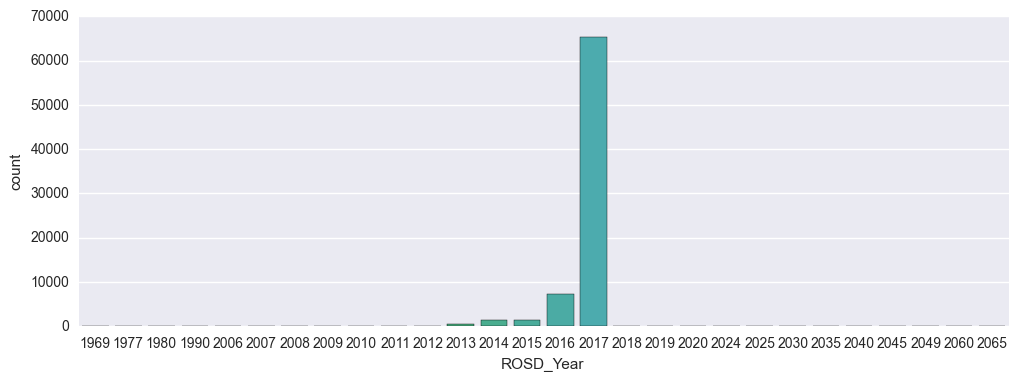

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 4))
ax = sns.countplot(x='ROSD_Year', data=order_data_filtered)
## consider only ROSD for year = 2013 , 2014 , 2015 , 2016 AND 2017

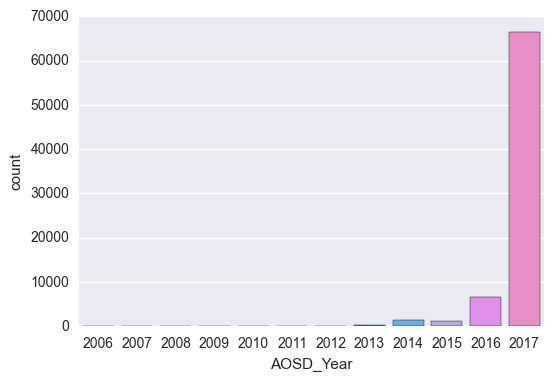

In [9]:
ax = sns.countplot(x='AOSD_Year', data=order_data_filtered)
## consider only AOSD for year = 2013 , 2014 , 2015 , 2016 AND 2017

In [11]:
## Apply ROSD and AOSD filters on the order data
order_data_filtered_bydate = order_data_filtered[order_data_filtered.ROSD_Year.isin([2013,2014,2015,2016,2017])]
order_data_filtered_bydate = order_data_filtered_bydate[order_data_filtered.AOSD_Year.isin([2013,2014,2015,2016,2017])]

In [12]:
## Get the OTD flag for OTD Calculation
order_data_filtered_bydate['OTD_Flag'] = np.where(order_data_filtered_bydate['days_delays'] >= 0 , 1 ,0)
order_data_filtered_bydate['OTD_Flag'].mean()*100

60.20465874863539

In [13]:
order_data_filtered_bydate.head()

,Process Dt FM,Order Number,F Set,Product Line Code,Product Line Desc,Modality Level PL-MO Code,Modality Level PL-MO Desc,ROSD,SOSD,AOSD,Ship Complete Date,days_delays,months_delays,ROSD_Year,AOSD_Year,OTD_Flag
3760,17-Apr,4078327,1,PL_HC0510,Ultrasound_GE,MO_510,Ultrasound,2013-06-26,26/06/13,2017-06-04,05/05/15,-1439 days,-48 days +00:48:00,2013,2017,0
52191,17-Jun,4168576,10,PL_HC0610,Rad Systems_GE,MO_610,Rad Systems,2014-09-26,27/01/16,2017-11-05,NaN,-1136 days,-38 days +03:12:00,2014,2017,0
4900,17-Apr,4183708,1,PL_HC0726,Cuffs_GE,MO_726,Cuffs,2014-03-25,31/03/14,2017-04-21,27/03/14,-1123 days,-38 days +13:36:00,2014,2017,0
4902,17-Apr,4183708,1,PL_HC0793,Vital Signs_GE,MO_793,Vital Signs,2014-03-25,31/03/14,2017-04-21,27/03/14,-1123 days,-38 days +13:36:00,2014,2017,0
4897,17-Apr,4183708,1,PL_HC0721,Monitoring Platforms_GE,MO_721,Monitoring Platforms,2014-03-25,31/03/14,2017-04-21,27/03/14,-1123 days,-38 days +13:36:00,2014,2017,0


In [14]:
agr = pd.DataFrame(order_data_filtered_bydate.groupby("Product Line Desc")['OTD_Flag'].agg([np.mean, len]).reset_index())
agr.sort('len',inplace=True,ascending=False)
agr['OTD_Range']  = np.where(agr['mean'] <= .60,"Bad","Good")
#agr['OTD_Range']  = np.where( (agr['mean'] > .30) & (agr['mean'] <= .60),"Bad","Good")


In [16]:
agr.head()

,Product Line Desc,mean,len,OTD_Range
43,Ultrasound_GE,0.677896,16327,Good
44,Vital Signs_GE,0.559733,6144,Bad
29,Monitoring Platforms_GE,0.508785,5293,Bad
14,Diagnostic Cardiology_GE,0.583784,4440,Bad
8,CT_GE,0.689142,3693,Good


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text xticklabel objects>)

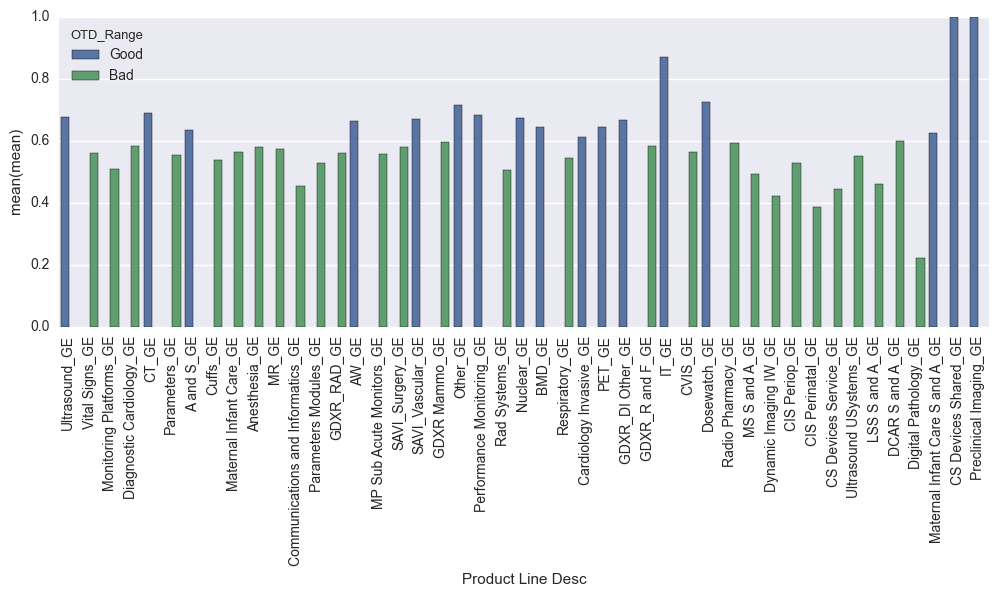

In [15]:
plt.figure(figsize=(12, 4))
sns.barplot(x='Product Line Desc', y="mean", data=agr,hue='OTD_Range')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text xticklabel objects>)

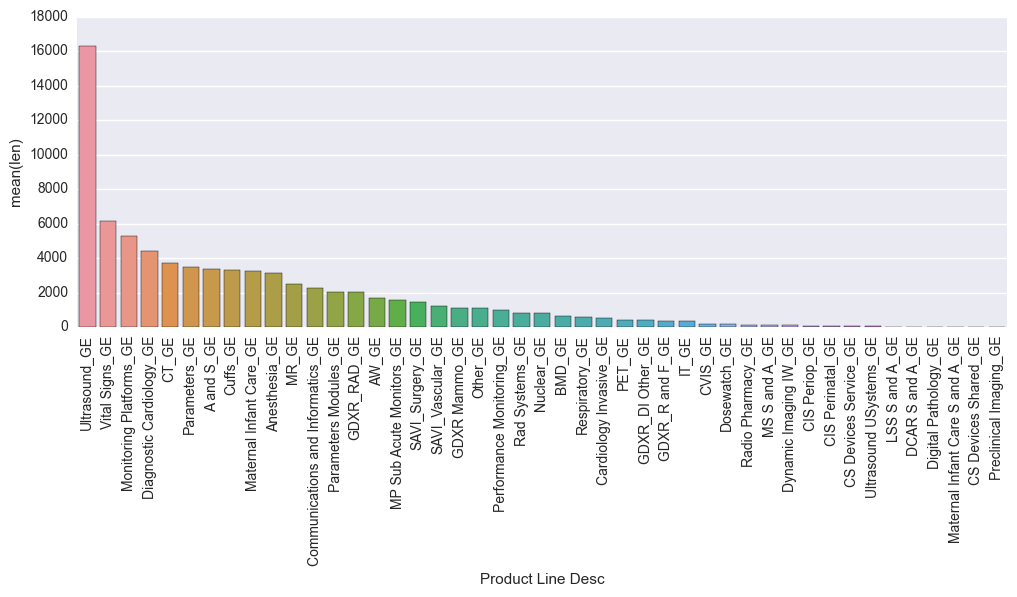

In [17]:
plt.figure(figsize=(12, 4))
sns.barplot(x='Product Line Desc', y="len", data=agr)
plt.xticks(rotation=90)

-1439 days +00:00:00
647 days 00:00:00


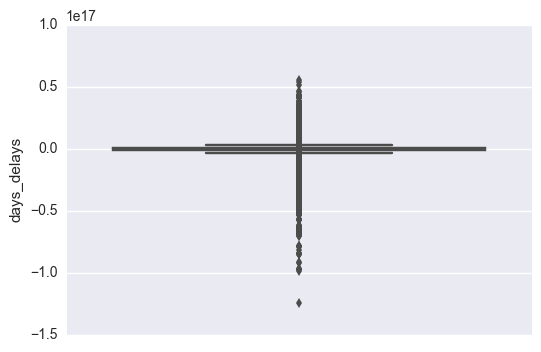

In [18]:
#ax = sns.countplot(x='days_delays', data=order_data_filtered)
#ax = sns.boxplot(x='days_delays', data=order_data_filtered)
sns.boxplot( y="days_delays", data=order_data_filtered_bydate)
#sns.despine(offset=10, trim=True)
print order_data_filtered_bydate.days_delays.min()
print order_data_filtered_bydate.days_delays.max()

-48 days +00:48:00
21 days 13:36:00


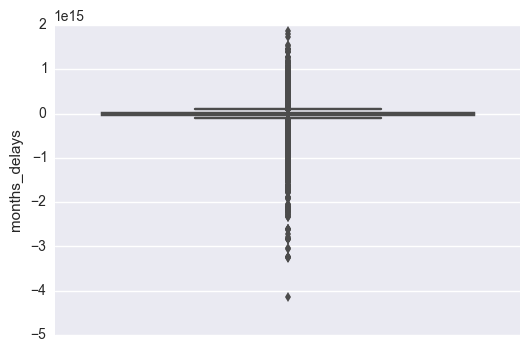

In [20]:
#ax = sns.countplot(x='days_delays', data=order_data_filtered)
#ax = sns.boxplot(x='days_delays', data=order_data_filtered)
sns.boxplot( y="months_delays", data=order_data_filtered_bydate)
#sns.despine(offset=10, trim=True)
print order_data_filtered_bydate.months_delays.min()
print order_data_filtered_bydate.months_delays.max()